In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

In [4]:
df = pd.read_csv('/Users/hfeiss/dsi/capstone-2/data/raw/accidents.csv')

In [5]:
df.columns

Index(['id', '0', 'accidentdate', '1', 'victimname', '2', 'reachid', '3',
       'countryabbr', '4', 'state', '5', 'river', '6', 'section', '7',
       'location', '8', 'waterlevel', '9', 'rellevel', '10', 'difficulty',
       '11', 'age', '12', 'experience', '13', 'privcomm', '14', 'boattype',
       '15', 'groupinfo', '16', 'numvictims', '17', 'othervictimnames', '18',
       'description', '19', 'type', '20', 'cause', '21', 'contactname', '22',
       'contactphone', '23', 'contactemail', '24', 'status', '25'],
      dtype='object')

In [6]:
cols_to_drop = [col for col in df.columns][1::2]
cols_to_drop.extend(['victimname', 'othervictimnames', 'contactname', 'contactphone', 'contactemail', 'reachid'])
for col in cols_to_drop:
    del df[col]

(array([1.090e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 1.202e+03, 1.226e+03, 2.000e+00]),
 array([612411.0088327 , 627435.80794943, 642460.60706616, 657485.40618289,
        672510.20529962, 687535.00441635, 702559.80353308, 717584.60264981,
        732609.40176654, 747634.20088327, 762659.        ]),
 <a list of 10 Patch objects>)

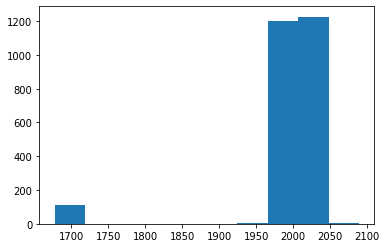

In [7]:
plt.hist(pd.to_datetime(df['accidentdate']))

In [9]:
df.head()

,id,accidentdate,countryabbr,state,river,section,location,waterlevel,rellevel,difficulty,age,experience,privcomm,boattype,groupinfo,numvictims,description,type,cause,status
0,-2638,2001-12-08,US,PA,Meadow Run,NaN,Slides above 381 Bridge,NaN,M,V,NaN,NaN,P,K,NaN,0.0,<p>Non-Witness Narrative by ccw on 2008-01-14 ...,I,11.0,D
1,5,1979-10-21,US,SC,Chattooga,Section 4 - Route 76 Bridge to Tugaloo Lake Bo...,Jawbone,1.55,NaN,IV+,20.0,X,C,K,NaN,1.0,<p>\r\n\tDescription: The Chatooga River forms...,F,15.0,R
2,3,1978-05-13,US,ID,"Payette, S. Fork (2 - Deadwood River to Danski...",2 - Deadwood River to Danskin Station (The Can...,Class 3-4 Chute Below Falls,NaN,M,IV,55.0,E,P,K,NaN,1.0,"<p>\r\n\tOn May 13, 1978 Dr. Walt Blackadar di...",F,14.0,R
3,17,1983-01-14,CI,I,Bio-Bio (Chile),NaN,Lost Yak Rapid,20K,H,V,0.0,I,C,R,NaN,1.0,"<p>\r\n\tOn January 14, 1983 Ted Davis lost hi...",F,7.0,R
4,538,1999-05-07,US,CA,Dinkey Creek,2. Dinkey Creek Campgrounds to logging spur road,Entrance to Cherry Bomb Falls,500-600 cfs,M,V,43.0,E,P,K,NaN,1.0,"<p>\r\n\t<span style=""font-size: 10pt;"">Dinkey...",F,4.0,R


In [8]:
df['difficulty'].value_counts()

IV      477
III     388
II      284
V       278
I       153
IV+      48
VI       42
III+     31
V+       16
II+      11
IV-       1
Name: difficulty, dtype: int64

In [9]:
df['type'].value_counts()

F    1616
I     569
M     339
       12
Name: type, dtype: int64

In [10]:
df['numvictims'].value_counts()

1.0    1425
0.0     542
2.0      88
3.0      21
4.0       4
5.0       3
8.0       2
Name: numvictims, dtype: int64

In [11]:
df['boattype'].value_counts()

K    801
R    693
O    290
N    282
T    154
I    114
Name: boattype, dtype: int64

In [12]:
df['description'][0]

"<p>Non-Witness Narrative by ccw on 2008-01-14 (okay to publish):  Acott Loveland Injured on Slides of Meadow Creek, Ohiopyle PA  Posted: Sat Jan 12, 2008 8:39 pm   Best Wishes For A Speedy Recovery To Scot Loveland   I wanted to update everyone on Scott's status, to stop any rumors, bring everyone up to speed, and allow everyone to send their best hopes and prayers on for his speedy recovery.  Today, 1/12/08 Scott flipped over in the Class V Slides rapid of Meadow Run in Ohiopyle and sustained a sharp blow to his head and/or neck. He was recovered by boaters in the pool at the bottom, where he complained of neck pain and numbness in his right arm. Paramedics were called to the scene, and it was decided that he would be life flighted to a trauma hospital in Pittsburgh.  There is good and bad news to follow: The bad is that Scott sustained a fracture to one of the vertebrae in his neck. The good news is that he has feeling and motion in all of limbs. They are waiting for an MRI to decid

In [13]:
df['type'][0]

'I'

In [14]:
m = df[df['type'] == 'M']

In [15]:
m.reset_index(drop=True, inplace=True)
m['description'][0]

n my head. They were floating into Ambulance Run, the shallow class 2 rapid before the jumping rock pool above Hospital Bar. Ambulance Ran is shallow and rocky on the left and clean on the right. My immediate concern was that Dave would swim Ambulance Run, lose consciousness, and get a foot entrapment. Approaching the rapid with Dave clinging to the front of our boat, our expert shouted for help.&nbsp;</div>\r\n\t<div>\r\n\t\t&nbsp;</div>\r\n\t<div>\r\n\t\tA second kayaker from our group and I rafted-up with our expert. We had a three kayak raft, with Dave barely holding onto the front of our expert&#39;s boat. The expert and I one-armed paddled us towards river right. Our middle kayak used both hands to hold our raft together. Fortunately, we got right, missing the boof rock at the middle bottom of the rapid by a few feet. To Dave&#39;s credit, he hung on like a champ through the wave train. We got to shore on river left at the beginning of the jump rock pool, upstream of Hospital Bar

In [16]:
df.info

<bound method DataFrame.info of          id accidentdate countryabbr state  \
0     -2638   2001-12-08          US    PA   
1         5   1979-10-21          US    SC   
2         3   1978-05-13          US    ID   
3        17   1983-01-14          CI    I    
4       538   1999-05-07          US    CA   
...     ...          ...         ...   ...   
2538  53753   2019-10-26          US    AL   
2539     45   1987-08-01          CA    BC   
2540  50524   2019-09-21          US    MD   
2541  49855   2019-05-17          US    MD   
2542  58181   2019-12-01          US    TN   

                                                  river  \
0                                            Meadow Run   
1                                            Chattooga    
2     Payette, S. Fork (2 - Deadwood River to Danski...   
3                                       Bio-Bio (Chile)   
4                                          Dinkey Creek   
...                                                 ...   
25

In [17]:
df['rellevel'].value_counts()

M    711
H    706
L    245
F     68
Name: rellevel, dtype: int64

In [18]:
df['experience'].value_counts()

     619
E    543
I    540
S    201
X    101
Name: experience, dtype: int64

In [19]:
df['state'].value_counts()

CO    259
CA    176
WV    176
PA    137
ID    134
     ... 
BS      1
LA      1
NL      1
YU      1
ES      1
Name: state, Length: 93, dtype: int64

In [20]:
clean = pd.read_pickle('/Users/hfeiss/dsi/capstone-2/data/clean/clean.pkl')

In [21]:
clean.columns

Index(['id', 'accidentdate', 'countryabbr', 'state', 'rellevel', 'difficulty',
       'age', 'experience', 'description', 'type', 'kayak', 'commercial', 'F',
       'I', 'M', 'target'],
      dtype='object')

In [ ]:
young = clean[clean['age'] != 0]
young['age'].